In [18]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
IMAGE_SIZE = 224
classes = 2

In [20]:
from google.colab import drive
import os

drive.mount('/content/drive/')

!ls '/content/drive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
MyDrive


In [21]:
# Tentukan direktori dataset
train_path = '/content/drive/MyDrive/datasetgita/dataset/training'
test_path = '/content/drive/MyDrive/datasetgita/dataset/testing'

In [22]:
# Preprocessing dan normalisasi gambar
# Misalnya, menggunakan ImageDataGenerator untuk melakukan augmentasi data dan normalisasi

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Inisialisasi ImageDataGenerator untuk augmentasi dan normalisasi data train
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Inisialisasi ImageDataGenerator untuk normalisasi data test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Proses augmentasi dan normalisasi data train
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/datasetgita/dataset/training', target_size=(224, 224), batch_size=32, class_mode='categorical'
)

# Proses normalisasi data test
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/datasetgita/dataset/testing', target_size=(224, 224), batch_size=32, class_mode='categorical'
)


Found 500 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [23]:
class_name = list(train_generator.class_indices.keys())
class_name

['mobil', 'motor']

In [24]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [26]:
model.add(Flatten())
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=2, activation= "softmax"))

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    batch_size= 32,
    shuffle= True)

Epoch 1/10
16/16 [==============================] - 727s 46s/step - loss: 1.5942 - accuracy: 0.4920 - val_loss: 0.6921 - val_accuracy: 0.5714
Epoch 2/10
16/16 [==============================] - 714s 45s/step - loss: 0.6936 - accuracy: 0.4680 - val_loss: 0.6932 - val_accuracy: 0.4286
Epoch 3/10
16/16 [==============================] - 715s 45s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.4286
Epoch 4/10
16/16 [==============================] - 717s 45s/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6928 - val_accuracy: 0.5714
Epoch 5/10
16/16 [==============================] - 722s 45s/step - loss: 0.6933 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5714
Epoch 6/10
16/16 [==============================] - 718s 45s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5714
Epoch 7/10
16/16 [==============================] - 718s 45s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 

In [28]:
scores = model.evaluate(test_generator)

1/1 [==============================] - 8s 8s/step - loss: 0.6923 - accuracy: 0.5714


In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 10

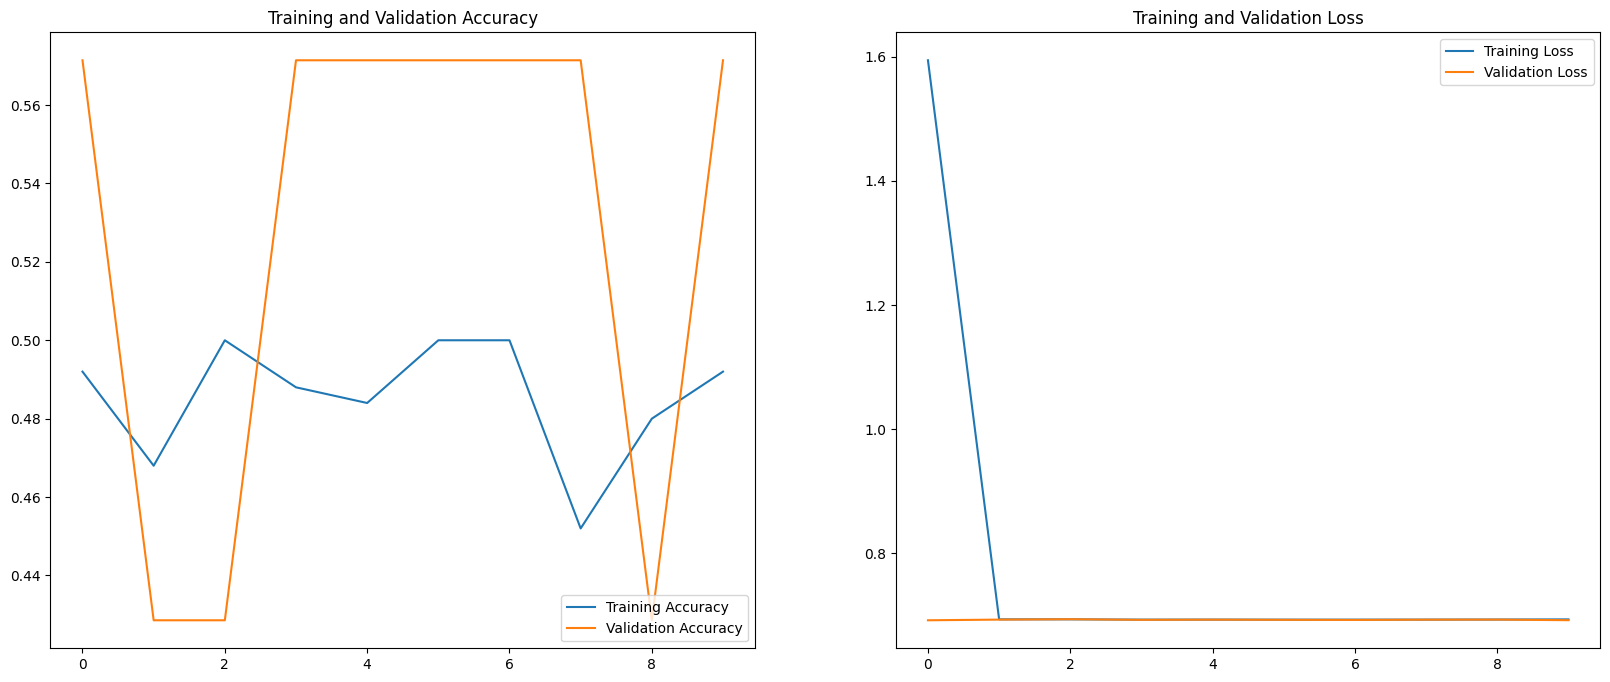

In [30]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 464ms/step


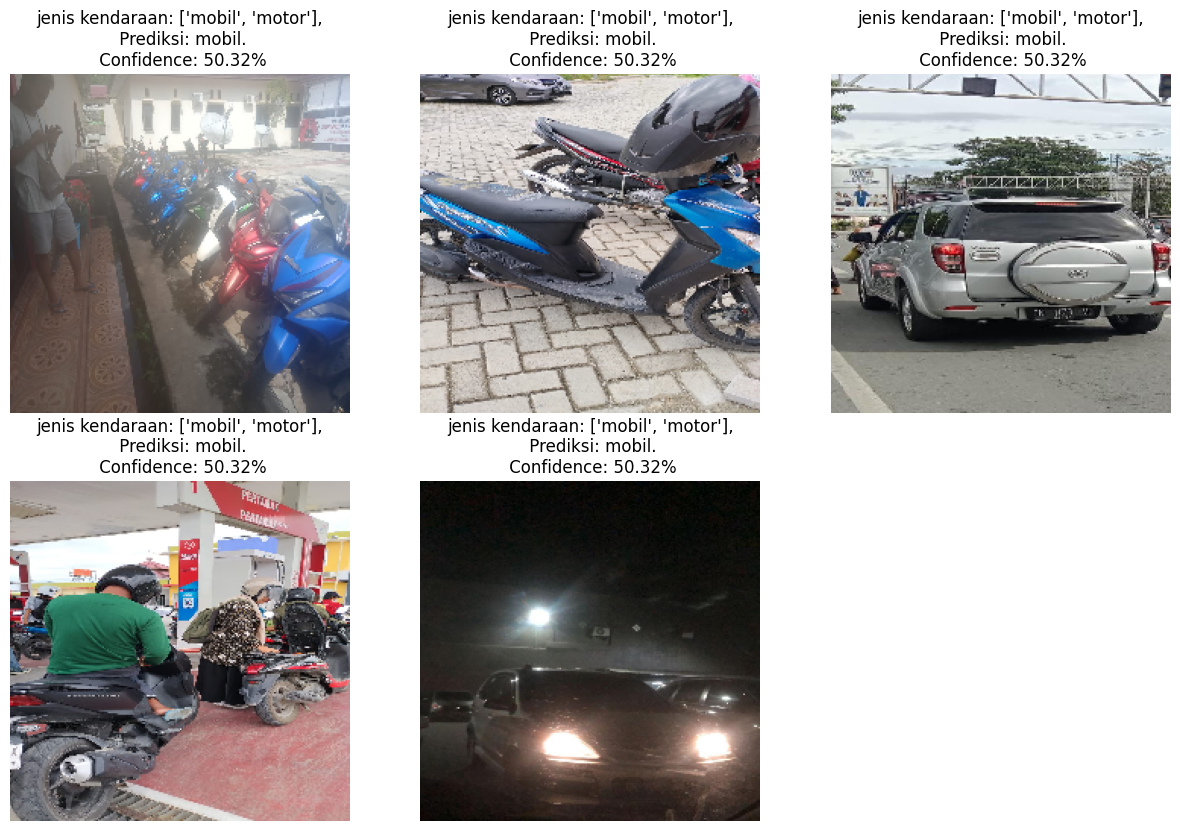

In [34]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break